## MODELLING FOR THE FRAUD CLASSIFICATION

This Problem deals with the algorithm being able to correctly classify a Transaction as Fraudulent or not. Here, it is a binary classification problem.

Here I will fit four classification models :

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. XGBOOST

In [2]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Libraries Required

import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn
import imblearn
from xgboost import XGBClassifier
import seaborn as sns
%matplotlib inline
!pip install --upgrade scikit-learn

#set random seed for reproducibility
np.random.seed(20)
import warnings
warnings.filterwarnings('ignore')

In [40]:
# pip install -U scikit-learn imbalanced-learn

In [41]:
# pip install --user scikit-learn imbalanced-learn

In [4]:
df_preprocess = pd.read_pickle('data/pickles/df_prep')

In [5]:
df_preprocess.shape

(786363, 251)

In [6]:
#Check for Percentage Statistics of Fraudulent vs Genuine Transactions [Non-Fraud: Class 1, Fraud : Class 0]

gen_trans = len(df_preprocess[df_preprocess.isFraud==0])
fraud_trans = len(df_preprocess[df_preprocess.isFraud==1])

In [7]:
fraud_pctg= fraud_trans/(fraud_trans+gen_trans) * 100

In [8]:
print("Number of Genuine transactions: ", gen_trans)
print("Number of Fraud transactions: ", fraud_trans)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_pctg))

Number of Genuine transactions:  773946
Number of Fraud transactions:  12417
Percentage of Fraud transactions: 1.5790


<Axes: xlabel='isFraud', ylabel='count'>

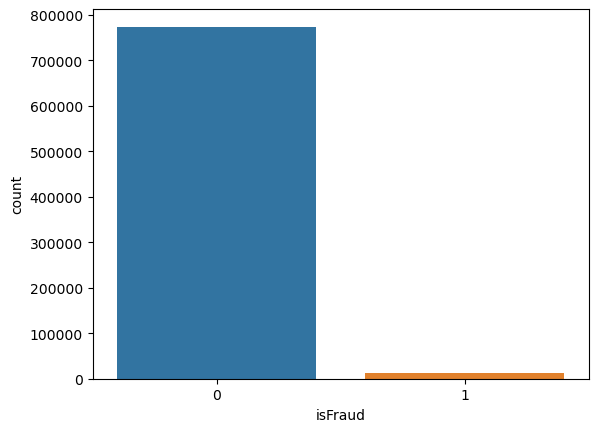

In [9]:
sns.countplot(x='isFraud', data = df_preprocess)

In [10]:
# pip install -U imbalanced-learn

In [11]:
df_preprocess

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchCVV,transMonth,transDay,...,merchantName_ikea.com,merchantName_netflix.com,merchantName_oldnavy.com,merchantName_pottery-barn.com,merchantName_sears.com,merchantName_staples.com,merchantName_target.com,merchantName_walmart.com,merchantName_westelm.com,merchantName_williamssonoma.com
0,5000,5000.00,98.55,0.00,0,0,0,1,8,13,...,False,False,False,False,False,False,False,False,False,False
1,5000,5000.00,74.51,0.00,1,0,0,1,10,11,...,False,False,False,False,False,False,False,False,False,False
2,5000,5000.00,7.47,0.00,0,0,0,1,11,8,...,False,False,False,False,False,False,False,False,False,False
3,5000,5000.00,7.47,0.00,0,0,0,1,12,10,...,False,False,False,False,False,False,False,False,False,False
4,5000,5000.00,71.18,0.00,1,0,0,1,3,24,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,0,0,0,1,12,22,...,False,False,False,False,False,False,False,False,False,False
786359,50000,48785.04,18.89,1214.96,0,0,0,1,12,25,...,False,False,False,False,False,False,False,False,False,False
786360,50000,48766.15,49.43,1233.85,0,0,0,1,12,27,...,False,False,False,False,False,False,False,False,False,False
786361,50000,48716.72,49.89,1283.28,0,0,0,1,12,29,...,False,False,False,False,False,False,False,True,False,False


In [12]:
df_preprocess['timeSinceAccountOpening']

0          44807252
1          49871154
2          52305519
3          55044890
4          20034286
            ...    
786358    136752252
786359    137002834
786360    137173584
786361    137291455
786362    137448629
Name: timeSinceAccountOpening, Length: 786363, dtype: int64

In [13]:
#Normalizing the data

from sklearn import preprocessing

def normalize(df):
    fields = ["creditLimit", "availableMoney", "transactionAmount", "transactionformatted", "currentBalance", "timeSinceAccountOpening", "timeTillExp", "timeSinceAddressChange"]
    for j in fields:
        df[j]= preprocessing.normalize(df[[j]], axis=0)
    return df

df_normalized = normalize(df_preprocess)

In [14]:
df_normalized.shape

(786363, 251)

In [15]:
Y= df_normalized['isFraud']
x= df_normalized.drop(['isFraud'],axis=1)

In [16]:
x.shape

(786363, 250)

In [17]:
# Perform Random sampling to Address Class Imbalance in our Data.
sample= imblearn.under_sampling.RandomUnderSampler(random_state=42)
X,Y= sample.fit_resample(x,Y)

In [18]:
len(Y)

24834

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#Display Train and Test Set Shapes
print("Training Set Shape : " ,X_train.shape)
print("Testing Set Shape : " ,X_test.shape)

Training Set Shape :  (17383, 250)
Testing Set Shape :  (7451, 250)


### Logistic Regression

In [20]:
#Fitting our Data to Logistic Regression

from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=42, max_iter=1000)
Log_Reg.fit(X_train, Y_train)
Log_Reg_pred = Log_Reg.predict(X_test)

Log_Reg_pred_prob = Log_Reg.predict_proba(X_test)
# Log_Reg_roc = [Y_test, Log_Reg_pred_prob]

In [27]:
Log_Reg_pred==Y_test

620089     True
641205     True
483444     True
260081    False
313515     True
          ...  
576759    False
239664     True
405421     True
539049     True
588057     True
Name: isFraud, Length: 7451, dtype: bool

In [22]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve

def classification_metrics(actuals, predictions):
    acc= accuracy_score(actuals,predictions)
    prec = precision_score(actuals,predictions)
    rec = recall_score(actuals,predictions)
    f1=f1_score(actuals,predictions)
    cm=confusion_matrix(actuals,predictions)
    fpr,tpr,_ = roc_curve(actuals,predictions)
    
    # Print the classification metrics
    print("Classification Metrics:\n")
    print("--------------------------")
    print(f"Accuracy:\t {acc:.4f}")
    print(f"Precision:\t {prec:.4f}")
    print(f"Recall:\t\t {rec:.4f}")
    print(f"F1-score:\t {f1:.4f}")
    
    cmd= ConfusionMatrixDisplay(cm, display_labels=[0,1])
    cmd.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [23]:
def feature_importance(imp):
    imp_features= np.sort(imp)[:50]
    num= len(imp_features)
    print(f"Plotting Feature Importance Scores of {model} model for top {num} features:")
    print("---------------------------------------------------------------------------------")
    for i,v in enumerate(imp[:num]):
        print('Feature: %0d, Score: %.5f' % (i,v))
    plt.figure(figsize=(20,5))
    pyplot.bar(np.arange(0,num), imp[:num], color = list('rgbkymc'))
    plt.xticks(np.arange(0,num), np.array(X_train.columns[:num]), rotation = "vertical")
    pyplot.show()

Evaluation of Logistic Regression Model
-------------------------------------------

Classification Metrics:

--------------------------
Accuracy:	 0.6704
Precision:	 0.6601
Recall:		 0.6954
F1-score:	 0.6773


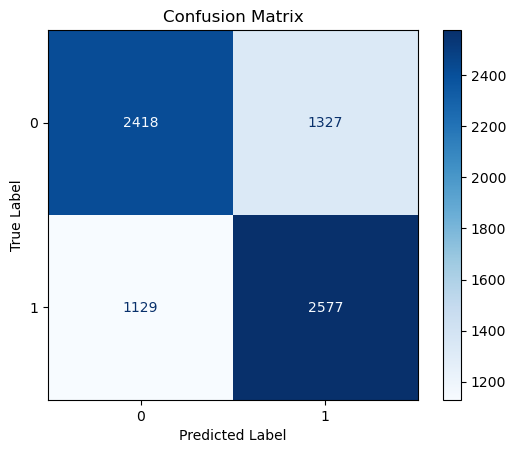



ROC CURVE FOR LOGISTIC REGRESSION
-------------------------------------------


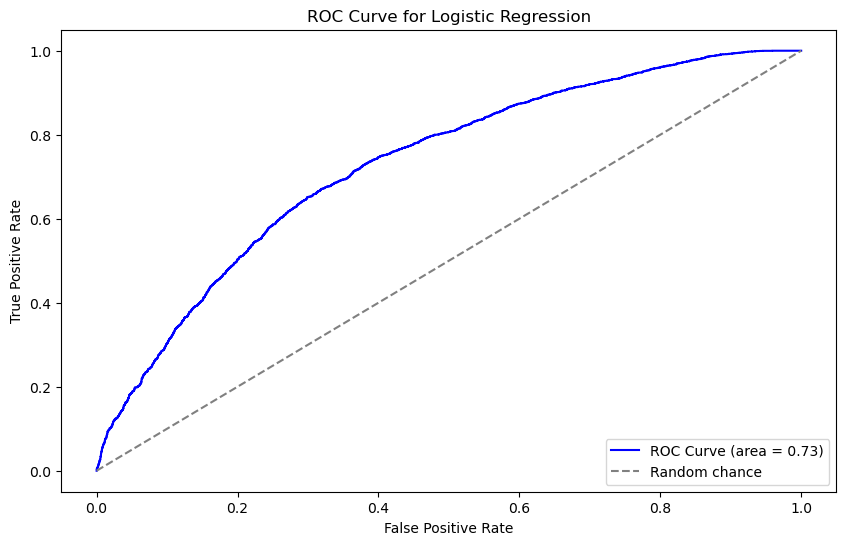

In [29]:
print("Evaluation of Logistic Regression Model")
print("-------------------------------------------")
print()
classification_metrics(Y_test, Log_Reg_pred.round())
print()
print()
print("ROC CURVE FOR LOGISTIC REGRESSION")
print("-------------------------------------------")
# plot_roc_curve(Log_Reg, X_test,Y_test)

# Compute the ROC curve and AUC score
fpr, tpr, _ = roc_curve(Y_test, Log_Reg.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(Y_test, Log_Reg.predict_proba(X_test)[:, 1])

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc

0.7296037097853804

Plotting Feature Importance Scores of Logistic Regression model for top 50 features:
---------------------------------------------------------------------------------
Feature: 0, Score: 30.00000
Feature: 1, Score: 35.00000
Feature: 2, Score: 38.00000
Feature: 3, Score: 29.00000
Feature: 4, Score: 163.00000
Feature: 5, Score: 42.00000
Feature: 6, Score: 63.00000
Feature: 7, Score: 204.00000
Feature: 8, Score: 6.00000
Feature: 9, Score: 33.00000
Feature: 10, Score: 183.00000
Feature: 11, Score: 197.00000
Feature: 12, Score: 196.00000
Feature: 13, Score: 66.00000
Feature: 14, Score: 16.00000
Feature: 15, Score: 58.00000
Feature: 16, Score: 147.00000
Feature: 17, Score: 69.00000
Feature: 18, Score: 200.00000
Feature: 19, Score: 21.00000
Feature: 20, Score: 191.00000
Feature: 21, Score: 68.00000
Feature: 22, Score: 239.00000
Feature: 23, Score: 146.00000
Feature: 24, Score: 155.00000
Feature: 25, Score: 98.00000
Feature: 26, Score: 229.00000
Feature: 27, Score: 224.00000
Feature: 28, Score:

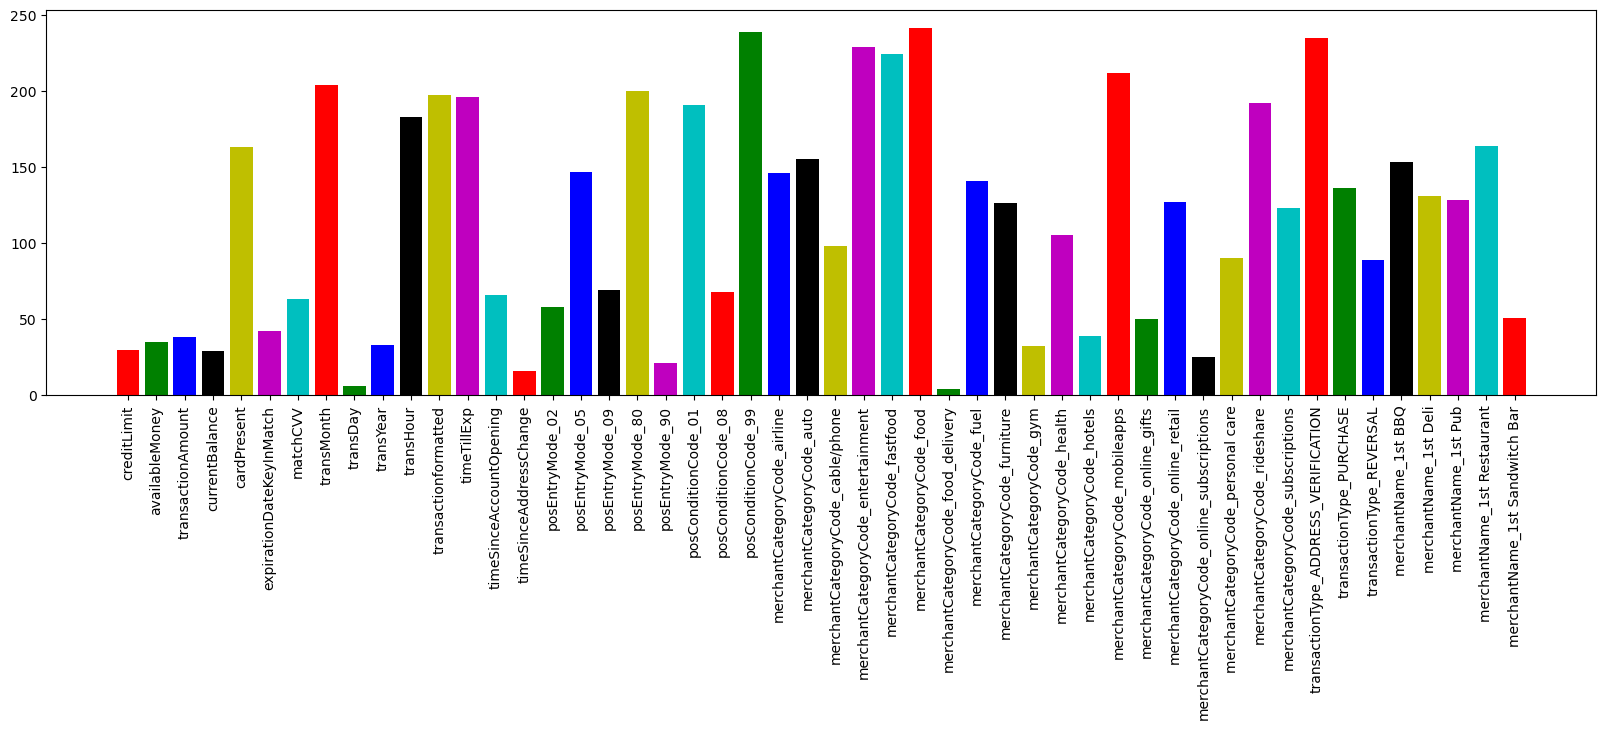

In [53]:
model = "Logistic Regression"
feature_importance(Log_Reg.coef_[0].argsort())

#### DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)
predictions_dt = decision_tree.predict(X_test)

dt_predictions_prob = decision_tree.predict_proba(X_test)
dt_Roc = [Y_test, dt_predictions_prob]

Evaluation of Decision Tree Model
-------------------------------------------
Classification Metrics:

--------------------------
Accuracy:	 0.6372
Precision:	 0.6312
Recall:		 0.6508
F1-score:	 0.6409


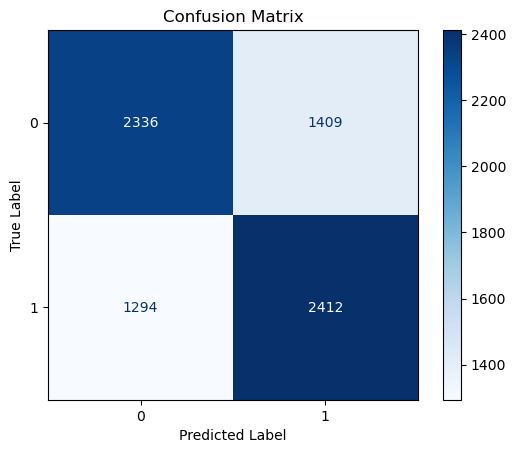

In [55]:
#Display Decision Tree Metrics

print("Evaluation of Decision Tree Model")
print("-------------------------------------------")
classification_metrics(Y_test, predictions_dt.round())

Plotting Feature Importance Scores of Decision Tree model for top 50 features:
---------------------------------------------------------------------------------
Feature: 0, Score: 249.00000
Feature: 1, Score: 126.00000
Feature: 2, Score: 129.00000
Feature: 3, Score: 60.00000
Feature: 4, Score: 59.00000
Feature: 5, Score: 221.00000
Feature: 6, Score: 57.00000
Feature: 7, Score: 56.00000
Feature: 8, Score: 55.00000
Feature: 9, Score: 54.00000
Feature: 10, Score: 142.00000
Feature: 11, Score: 144.00000
Feature: 12, Score: 146.00000
Feature: 13, Score: 48.00000
Feature: 14, Score: 148.00000
Feature: 15, Score: 149.00000
Feature: 16, Score: 89.00000
Feature: 17, Score: 156.00000
Feature: 18, Score: 63.00000
Feature: 19, Score: 157.00000
Feature: 20, Score: 248.00000
Feature: 21, Score: 67.00000
Feature: 22, Score: 88.00000
Feature: 23, Score: 86.00000
Feature: 24, Score: 95.00000
Feature: 25, Score: 96.00000
Feature: 26, Score: 82.00000
Feature: 27, Score: 103.00000
Feature: 28, Score: 104.

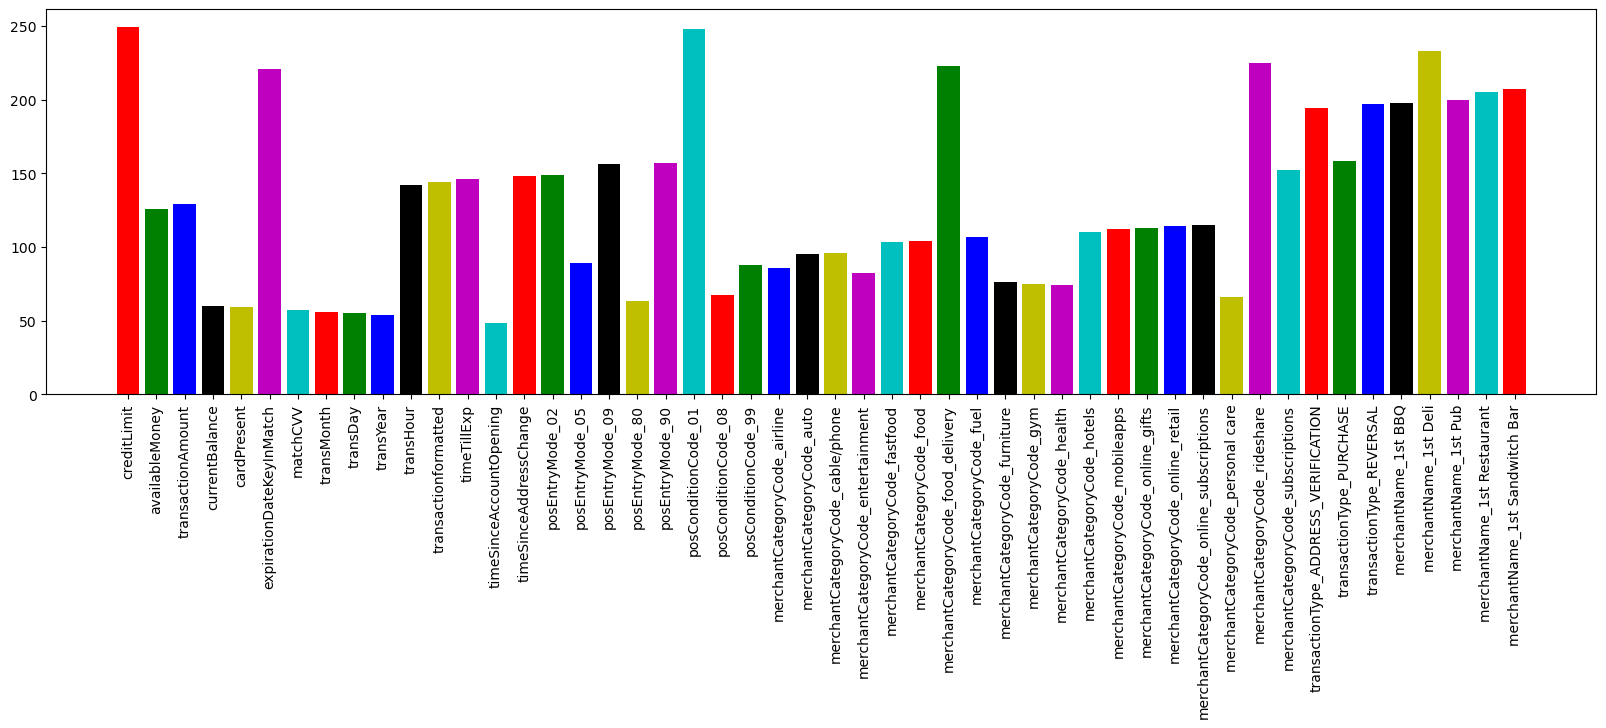

In [56]:
#Feature Imporatnce for Decision Tree
model = "Decision Tree"
feature_importance(decision_tree.feature_importances_.argsort())

#### RANDOM FOREST

In [57]:
#Fit Random Forest to our data 

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)

random_forest.fit(X_train, Y_train)
predictions_rf = random_forest.predict(X_test)

rf_predictions_prob = random_forest.predict_proba(X_test)
rf_Roc = [Y_test, rf_predictions_prob]

Evaluation of Random Forest Model
-------------------------------------------

Classification Metrics:

--------------------------
Accuracy:	 0.7203
Precision:	 0.7175
Recall:		 0.7218
F1-score:	 0.7197


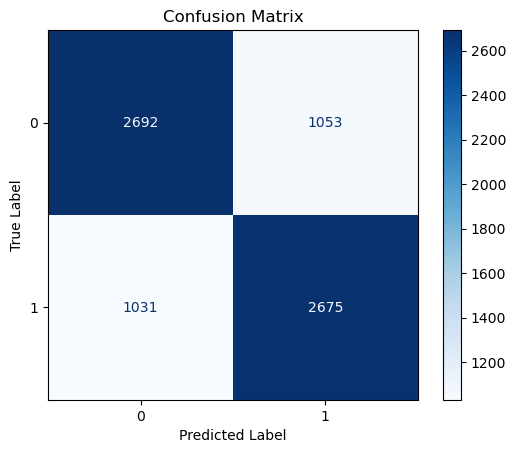

In [58]:
print("Evaluation of Random Forest Model")
print("-------------------------------------------")
print()
classification_metrics(Y_test, predictions_rf.round())

Plotting Feature Importance Scores of Random Forest model for top 50 features:
---------------------------------------------------------------------------------
Feature: 0, Score: 198.00000
Feature: 1, Score: 67.00000
Feature: 2, Score: 148.00000
Feature: 3, Score: 9.00000
Feature: 4, Score: 210.00000
Feature: 5, Score: 104.00000
Feature: 6, Score: 158.00000
Feature: 7, Score: 194.00000
Feature: 8, Score: 59.00000
Feature: 9, Score: 156.00000
Feature: 10, Score: 223.00000
Feature: 11, Score: 193.00000
Feature: 12, Score: 57.00000
Feature: 13, Score: 211.00000
Feature: 14, Score: 88.00000
Feature: 15, Score: 113.00000
Feature: 16, Score: 75.00000
Feature: 17, Score: 157.00000
Feature: 18, Score: 54.00000
Feature: 19, Score: 129.00000
Feature: 20, Score: 228.00000
Feature: 21, Score: 225.00000
Feature: 22, Score: 227.00000
Feature: 23, Score: 249.00000
Feature: 24, Score: 107.00000
Feature: 25, Score: 56.00000
Feature: 26, Score: 140.00000
Feature: 27, Score: 60.00000
Feature: 28, Score:

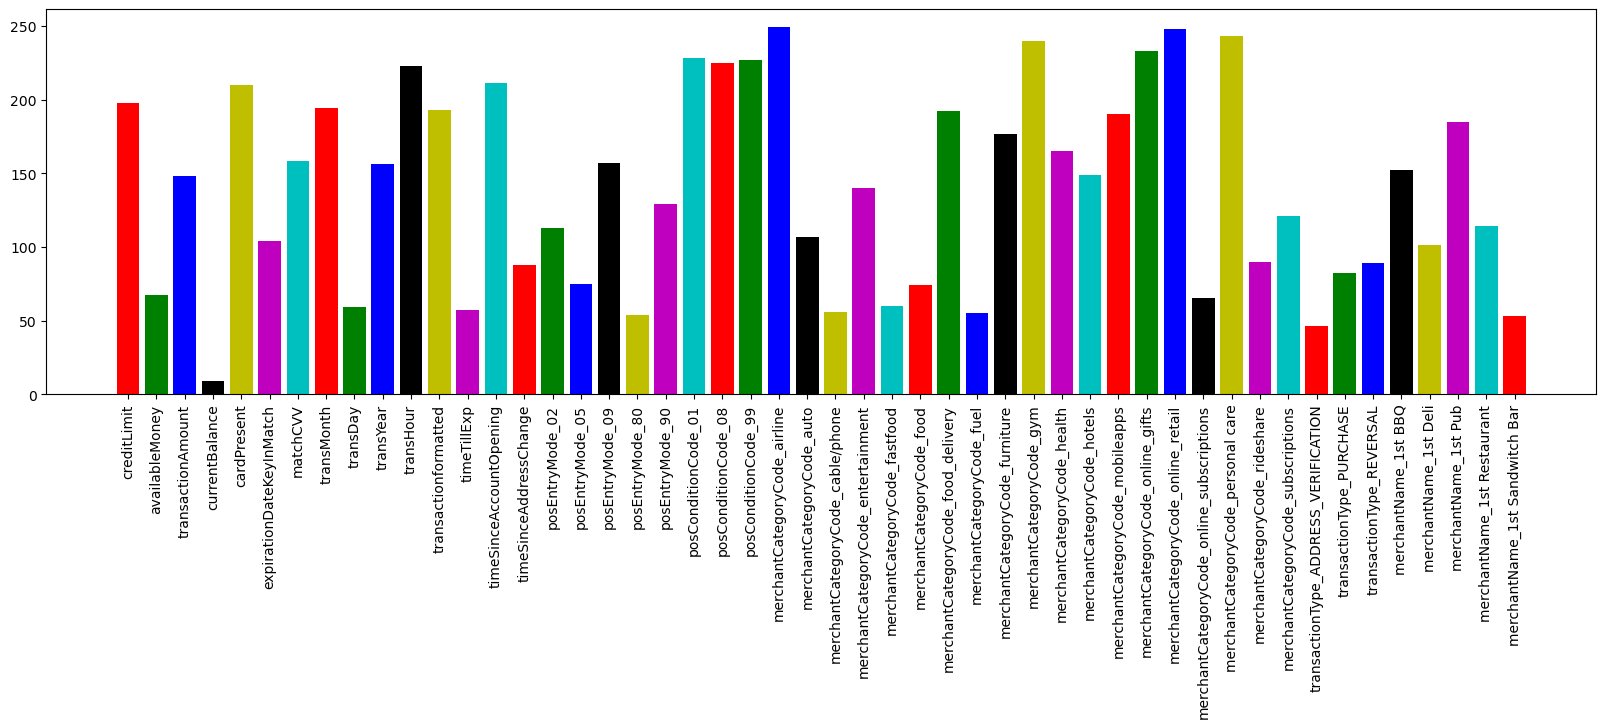

In [59]:
#Feature Importance for Random Forest
model = "Random Forest"
feature_importance(random_forest.feature_importances_.argsort())

#### eXtreme Gradient Boosting - XGBOOST

In [60]:
#Fit XGBOOST to data 

from xgboost import XGBClassifier
XGB_Model = XGBClassifier(random_state=42)

XGB_Model.fit(X_train, Y_train)
predictions_XGB = XGB_Model.predict(X_test)

XGB_pred_prob = XGB_Model.predict_proba(X_test)[:,1]
xgb_roc = [Y_test, XGB_pred_prob]

Evaluation of XGBOOST Model
-------------------------------------------
Classification Metrics:

--------------------------
Accuracy:	 0.7340
Precision:	 0.7310
Recall:		 0.7361
F1-score:	 0.7335


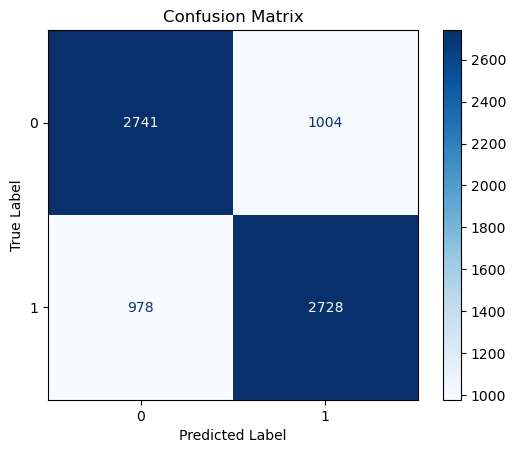

In [61]:
#Display XGBOOST Metrics

print("Evaluation of XGBOOST Model")
print("-------------------------------------------")
classification_metrics(Y_test, predictions_XGB.round())


In [63]:
print(f"Training accuracy is {Log_Reg.score(X_train, Y_train)}")
print(f"Training accuracy is {decision_tree.score(X_train, Y_train)}")
print(f"Training accuracy is {random_forest.score(X_train, Y_train)}")
print(f"Testing accuracy is {XGB_Model.score(X_train, Y_train)}")

Training accuracy is 0.6808375999539781
Training accuracy is 1.0
Training accuracy is 1.0
Testing accuracy is 0.8243111085543346
